In [8]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
data = pd.read_csv('CorrectDataTraining.csv')
data.iloc[:,2:].head()

,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Season,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYear,Promo2
0,5,2015-07-31,5263,1,1,0,1,2015,7,31,2,2,0,1270.0,2008.0,0
1,5,2015-07-31,6064,1,1,0,1,2015,7,31,2,0,0,570.0,2007.0,1
2,5,2015-07-31,8314,1,1,0,1,2015,7,31,2,0,0,14130.0,2006.0,1
3,5,2015-07-31,13995,1,1,0,1,2015,7,31,2,2,2,620.0,2009.0,0
4,5,2015-07-31,4822,1,1,0,1,2015,7,31,2,0,0,29910.0,2015.0,0


In [131]:
from sklearn.model_selection import train_test_split

numeric_cols = ['Store', 'StoreType', 'DayOfWeek', 
              'Promo', 'StateHoliday', 'Season',
              'Assortment','Promo2','Sales']

X_train, X_test, y_train, y_test = train_test_split(data[numeric_cols], data['Sales'], test_size=0.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1000)

In [132]:
X_train_array = X_train.iloc[:,:].values
X_test_array =  X_test.iloc[:,:].values
y_train_array = y_train.iloc[:].values
y_test_array =  y_test.iloc[:].values

In [133]:
X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

X_train, y_train = X_train_array[:,:-1], y_train_array[:]
X_test, y_test = X_test_array[:,:-1], y_test_array[:]

print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape)
y_test = np.log(y_test)
y_train = np.log(y_train)
print(y_test)
print(y_train)

(607923, 8) (607923,) (168868, 8) (168868,)
[7.98989937 8.10076824 8.88557929 ... 8.26204284 8.52535975 8.96852356]
[8.98306329 8.67008594 8.45914026 ... 8.94884573 8.48073665 8.41272117]


In [127]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [115]:
y_test.head(10)
plt.plot(range(0,10),y_test.head(10))

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [116]:
model = tf.keras.Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 200,return_sequences=True, input_shape = (1,8),activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(tf.keras.layers.LSTM(units = 200,return_sequences=True,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# model.add(tf.keras.layers.LSTM(units = 100,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

# Adding the output layer

model.add(tf.keras.layers.LSTM(units = 50,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1,activation='relu'))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.Accuracy()])


In [117]:

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 12,batch_size=512, validation_data = (X_test, y_test))
model.save('rnnModel_hd')

Train on 607923 samples, validate on 168868 samples
Epoch 1/12
607904/607923 [============================>.] - ETA: 0s - loss: 0.6600 - root_mean_squared_error: 0.8124 - accuracy: 0.0000e+00

/Users/deepaknandula/Library/Python/3.9/lib/python/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


607923/607923 [==============================] - 91s 149us/sample - loss: 0.6600 - root_mean_squared_error: 0.8124 - accuracy: 0.0000e+00 - val_loss: 0.1488 - val_root_mean_squared_error: 0.3857 - val_accuracy: 0.0000e+00
Epoch 2/12
607923/607923 [==============================] - 95s 156us/sample - loss: 0.1699 - root_mean_squared_error: 0.4122 - accuracy: 0.0000e+00 - val_loss: 0.1447 - val_root_mean_squared_error: 0.3804 - val_accuracy: 0.0000e+00
Epoch 3/12
607923/607923 [==============================] - 91s 149us/sample - loss: 0.1457 - root_mean_squared_error: 0.3817 - accuracy: 1.6449e-06 - val_loss: 0.1433 - val_root_mean_squared_error: 0.3785 - val_accuracy: 0.0000e+00
Epoch 4/12
607923/607923 [==============================] - 94s 155us/sample - loss: 0.1443 - root_mean_squared_error: 0.3799 - accuracy: 4.9348e-06 - val_loss: 0.1454 - val_root_mean_squared_error: 0.3814 - val_accuracy: 5.9218e-06
Epoch 5/12
607923/607923 [==============================] - 89s 147us/sample - 

In [128]:
result = model.predict(X_test)
result_denorm = np.exp(result)
y_test_denorm = np.exp(y_test)
df = pd.DataFrame(y_test_denorm)


# df.columns = ["Actual Sales","Predicted Sales"]
print(df)

             0
0       2951.0
1       3297.0
2       7227.0
3       5478.0
4       7235.0
...        ...
168863  6625.0
168864  8280.0
168865  3874.0
168866  5041.0
168867  7852.0

[168868 rows x 1 columns]


In [118]:
model.save('classifier_hd')

In [35]:
print(y_test.head(10))
print(result[:10])

871461     6014
201378        0
396282        0
992113     4065
136827    13189
696446     5703
247555     8051
744974     6737
537466     8273
622024    15321
Name: Sales, dtype: int64
[[7548], [24], [4], [4827], [9608], [6943], [6634], [7844], [6226], [7606]]


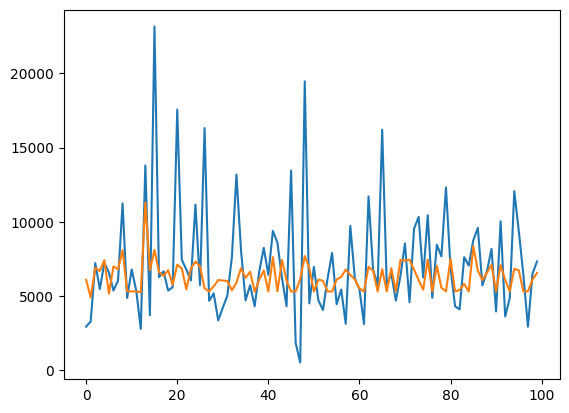

In [130]:
fig = plt.figure(1)
plt.plot(range(0,100), y_test_denorm[:100]) # plot first line
plt.plot(range(0,100), result_denorm[:100]) # plot second line
plt.show()